In [1]:
from keras.layers import  Dropout, Dense
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import metrics

Using TensorFlow backend.


In [2]:
def TFIDF(X_train, X_test, MAX_NB_WORDS=75000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer_x.fit_transform(X_train).toarray()
    X_test = vectorizer_x.transform(X_test).toarray()
    print("tf-idf with",str(np.array(X_train).shape[1]),"features")
    return (X_train,X_test)

In [3]:
def Word_vectorizer(X_train, X_test, MAX_NB_WORDS=75000):
    vectorizer = CountVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()
    print("words with",str(np.array(X_train).shape[1]),"features")
    return (X_train,X_test)

In [4]:
def Build_Model_DNN_Text(shape, nClasses, dropout=0.5):
    """ buildModel_DNN_Tex(shape, nClasses,dropout) Build Deep neural networks Model for text classification
    Shape is input feature space nClasses is number of classes """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer

    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
import pandas as pd
resource = pd.read_csv('document_categorization.csv')
from sklearn.model_selection import train_test_split
sentences_train, sentences_test, y_train, y_test = train_test_split(resource['documents'], resource['category'], \
                                                                    test_size=0.1, random_state=42)
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer()
#vectorizer.fit(sentences_train)
#X_train = vectorizer.transform(sentences_train)
#X_test  = vectorizer.transform(sentences_test)
X_train, X_test = Word_vectorizer(sentences_train, sentences_test)

words with 75000 features


In [6]:
model_DNN = Build_Model_DNN_Text(X_train.shape[1], 8)
model_DNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               38400512  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)              

In [7]:
model_DNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

Train on 720 samples, validate on 80 samples
Epoch 1/5
720/720 [==============================] - 3s 5ms/step - loss: 2.1048 - accuracy: 0.1264 - val_loss: 1.9740 - val_accuracy: 0.1250
Epoch 2/5
720/720 [==============================] - 3s 5ms/step - loss: 2.1078 - accuracy: 0.1681 - val_loss: 1.9902 - val_accuracy: 0.3750
Epoch 3/5
720/720 [==============================] - 3s 4ms/step - loss: 2.0888 - accuracy: 0.1986 - val_loss: 1.9405 - val_accuracy: 0.5500
Epoch 4/5
720/720 [==============================] - 3s 4ms/step - loss: 1.9918 - accuracy: 0.2347 - val_loss: 1.9288 - val_accuracy: 0.6375
Epoch 5/5
720/720 [==============================] - 3s 4ms/step - loss: 1.9073 - accuracy: 0.2569 - val_loss: 1.8574 - val_accuracy: 0.6875


In [8]:
predicted = model_DNN.predict_classes(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       1.00      0.43      0.60         7
           2       1.00      0.38      0.55         8
           3       1.00      0.93      0.96        14
           4       0.33      0.71      0.45         7
           5       0.80      0.67      0.73        12
           6       0.55      0.92      0.69        12
           7       0.80      1.00      0.89         8

    accuracy                           0.69        80
   macro avg       0.77      0.67      0.66        80
weighted avg       0.77      0.69      0.68        80



In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)

In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, predicted))

Accuracy :  0.6875


In [11]:
print(cm)

[[ 4  0  0  0  4  0  2  2]
 [ 1  3  0  0  2  0  1  0]
 [ 1  0  3  0  1  1  2  0]
 [ 0  0  0 13  1  0  0  0]
 [ 0  0  0  0  5  1  1  0]
 [ 0  0  0  0  1  8  3  0]
 [ 0  0  0  0  1  0 11  0]
 [ 0  0  0  0  0  0  0  8]]


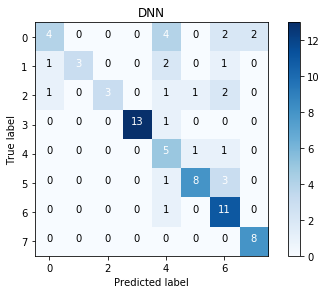

In [12]:
import matplotlib.pyplot as plt
import itertools
cmap = plt.cm.Blues
title = "DNN"
classes = 8
normalize = False
tick_marks = np.arange(classes)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(10)
#plt.xticks(tick_marks, classes, rotation=45)
#plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 5.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()